In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("winequality-red.csv")

display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


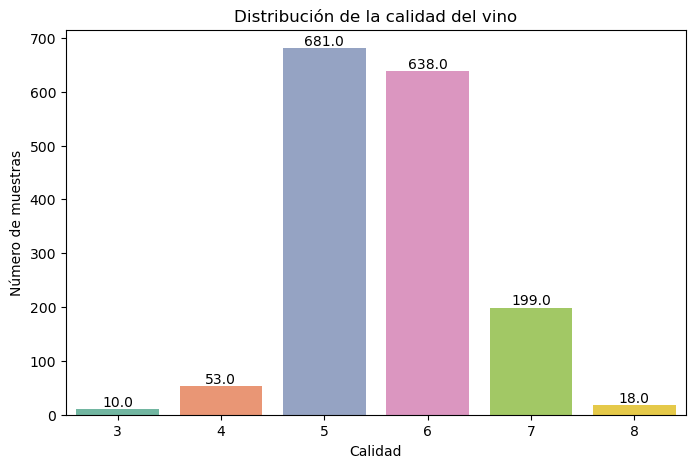

In [17]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='quality', data=df, hue='quality', palette='Set2', legend=False)  # hue añadido
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("Distribución de la calidad del vino")
plt.xlabel("Calidad")
plt.ylabel("Número de muestras")
plt.show()

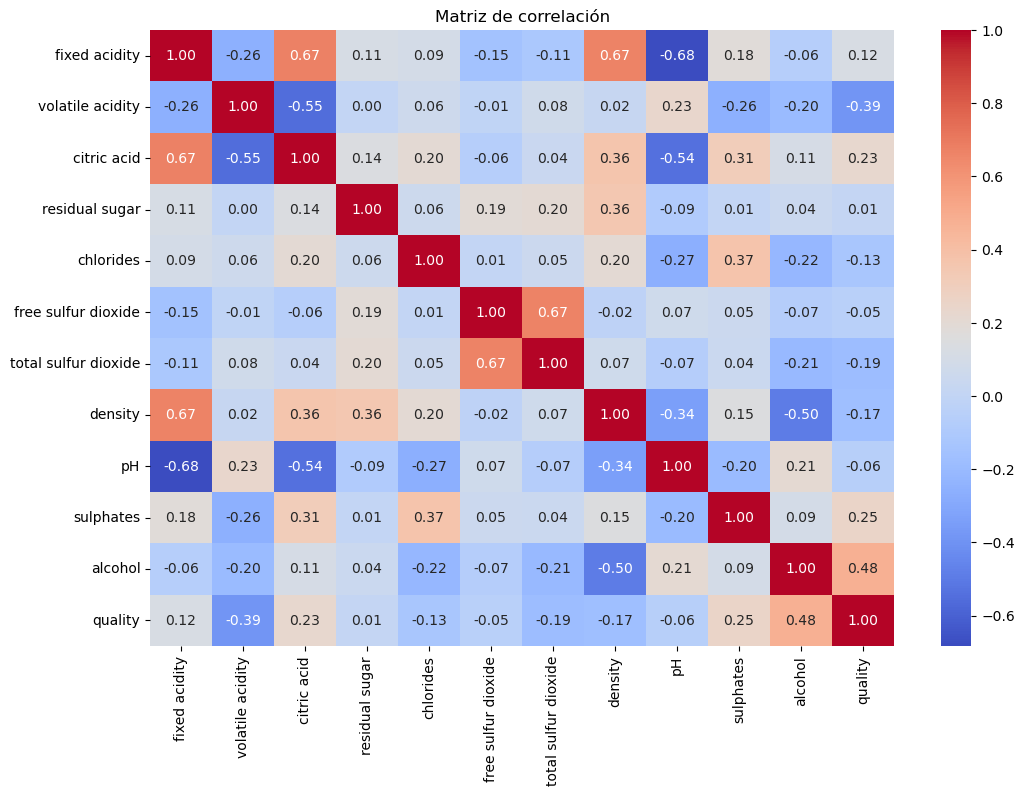

In [19]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

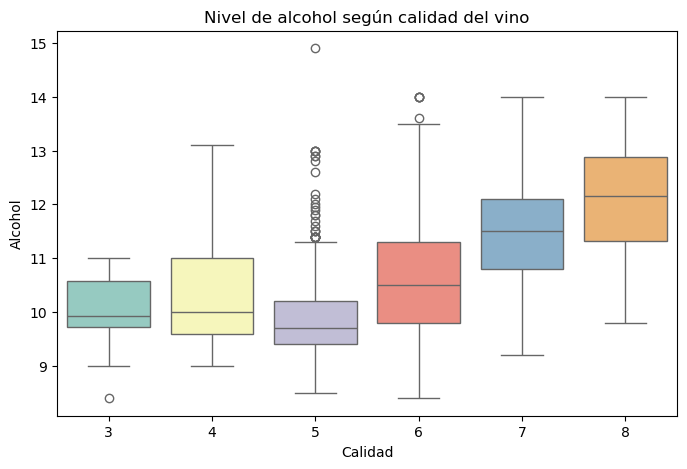

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=df, hue='quality', palette='Set3', legend=False)
plt.title("Nivel de alcohol según calidad del vino")
plt.xlabel("Calidad")
plt.ylabel("Alcohol")
plt.show()

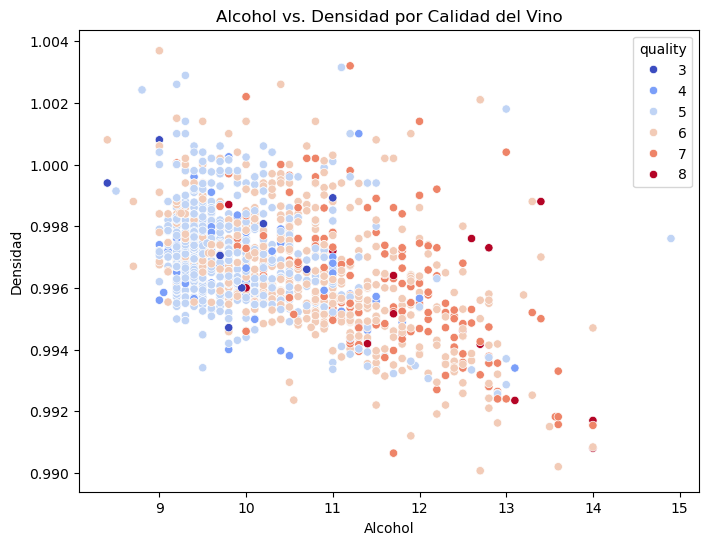

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='alcohol', y='density', hue='quality', palette='coolwarm')
plt.title("Alcohol vs. Densidad por Calidad del Vino")
plt.xlabel("Alcohol")
plt.ylabel("Densidad")
plt.show()

In [27]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [31]:
X = df.drop('quality', axis=1)
y = df['quality'] 


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
print("\nForma de X escalado:", X_scaled.shape)
print("Distribución de clases en 'quality':")
print(y.value_counts().sort_index())


Forma de X escalado: (1599, 11)
Distribución de clases en 'quality':
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [39]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40, stratify=y)

In [43]:
print("Conjunto de entrenamiento:", X_train.shape)
print("Conjunto de prueba:", X_test.shape)

Conjunto de entrenamiento: (1279, 11)
Conjunto de prueba: (320, 11)


In [51]:
arbol = DecisionTreeClassifier(random_state=40)

param_grid = {'max_depth': [3, 5, 7, 10, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(arbol, param_grid, cv=5, scoring= 'accuracy')
grid_search.fit(X_train, y_train)

modelo_F = grid_search.best_estimator_

In [53]:
print("Hiperparametros encontrados:")
print(grid_seach.best_params_)

Hiperparametros encontrados:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [95]:
y_pred = modelo_F.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.5875

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.09      0.11        11
           5       0.66      0.67      0.67       136
           6       0.54      0.60      0.57       128
           7       0.59      0.47      0.53        40
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.32      0.31      0.31       320
weighted avg       0.58      0.59      0.58       320



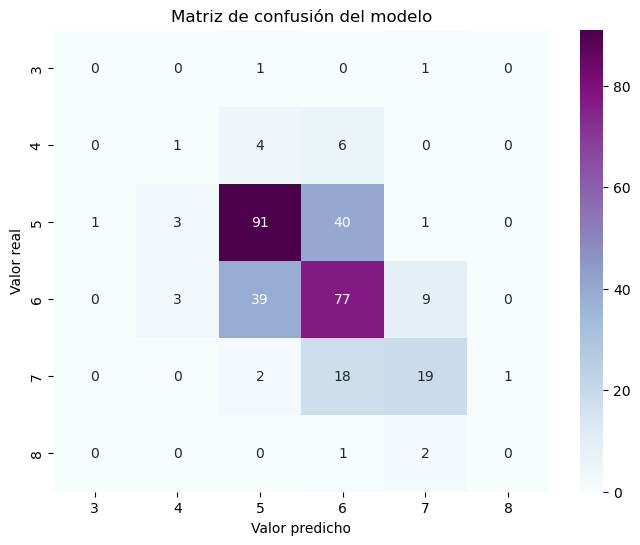

In [65]:
plt.figure(figsize=(8,6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu',xticklabels=sorted(df['quality'].unique()), yticklabels=sorted(df['quality'].unique()))
plt.title("Matriz de confusión del modelo")
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")
plt.show()

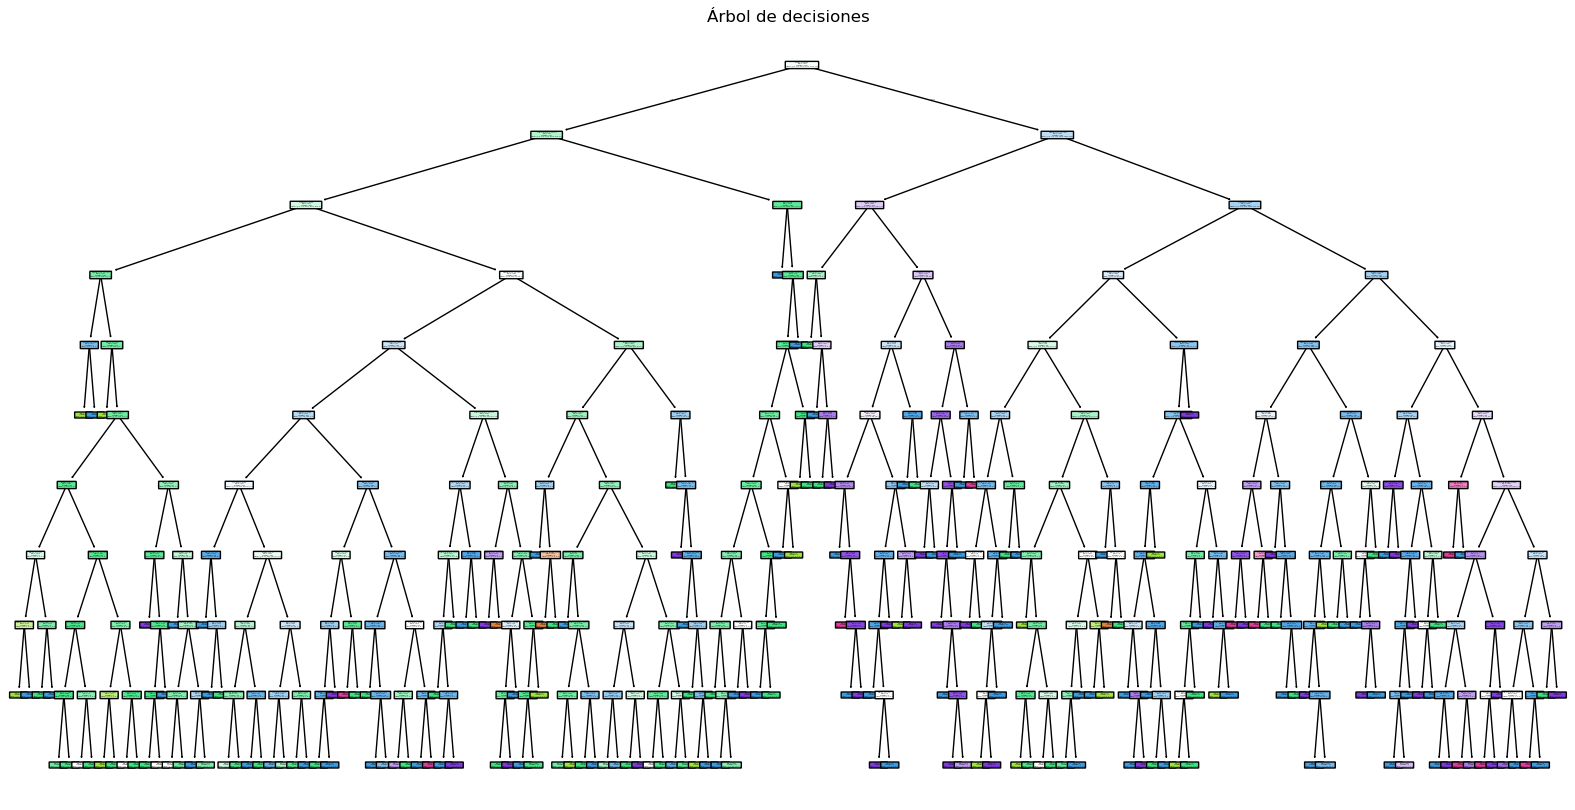

In [71]:
plt.figure(figsize=(20,10))
plot_tree(modelo_F, feature_names=X.columns, class_names=[str(c) for c in sorted(df['quality'].unique())], filled=True, rounded=True)
plt.title("Árbol de decisiones")
plt.show()

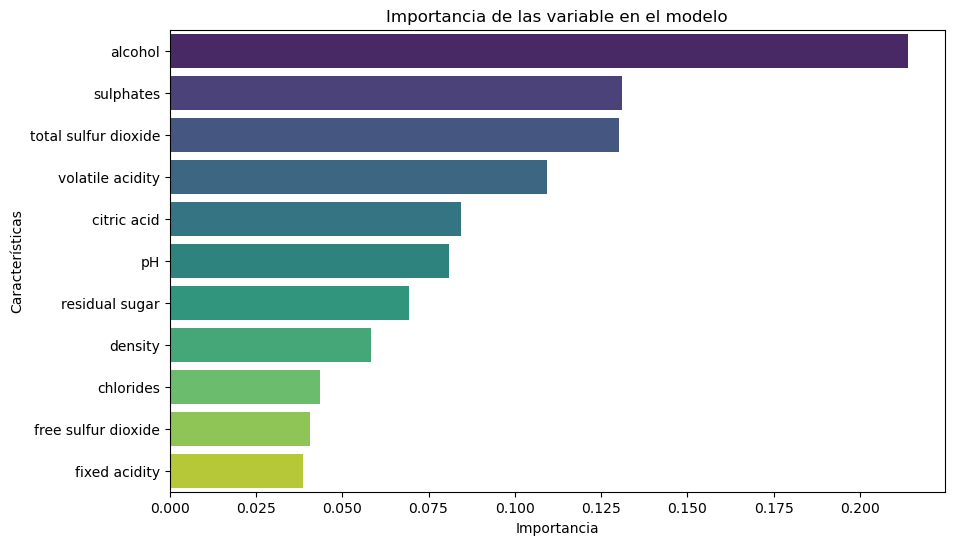

In [77]:
importancias = modelo_F.feature_importances_
features = X.columns
importancia_df = pd.DataFrame({'Característica': features, 'Importancia': importancias})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=importancia_df, hue='Característica', legend=False, palette='viridis')
plt.title("Importancia de las variable en el modelo")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()